# 第三章 分类

## 设置

首先，导入一些常用模块，确保 MatplotLib内联绘制图形并准备一个函数来保存图形。 然后检查是否安装了Python3.5或更高版本（虽然 Python 2.x 可以工作，但它已被弃用，因此我们强烈建议改用Python 3），以及Scikit-Learn ≥0.20。

In [1]:
# Python ≥ 3.5 is required
import sys
assert sys.version_info >= (3,5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "google.kaggle" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 3.1 MNIST

**警告：** 从 Scikit-Learn 0.24 开始，`fetch_openml()` 默认返回 Pandas `DataFrame`。 为了避免这种情况并保持与书中相同的代码，我们使用 `as_frame=False`。

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
# 查看数组数据
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [4]:
y.shape

(70000,)

Saving figure fig1_some_digit_plot


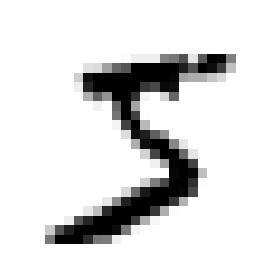

In [9]:
# 使用Matplotlib的imshow()函数显示
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")

# saving figure
save_fig("fig1_some_digit_plot")

plt.show()

In [10]:
# 看起来像5，而标签告诉我们没错：
y[0]

'5'

In [13]:
# 将字符转换为数字
y = y.astype(np.uint8)

In [14]:
# 准备测试集
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## 3.2 训练二元分类器